<a href="https://colab.research.google.com/github/nicolasvargaszz/Blogpost/blob/main/Depresion_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:

import nltk
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay

In [180]:
import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay

In [152]:
df = pd.read_excel("dataset_depresion.xlsx")

In [153]:
df.head()

text  label
0                                         oh my gosh    1.0
1  trouble sleeping, confused mind, restless hear...    1.0
2  All wrong, back off dear, forward doubt. Stay ...    1.0
3  I've shifted my focus to something else but I'...    1.0
4  I'm restless and restless, it's been a month n...    1.0

In [154]:
df.shape
df.isnull().sum()

text     10
label     2
dtype: int64

In [155]:
df.dropna(inplace=True)
df

text  label
0                                            oh my gosh    1.0
1     trouble sleeping, confused mind, restless hear...    1.0
2     All wrong, back off dear, forward doubt. Stay ...    1.0
3     I've shifted my focus to something else but I'...    1.0
4     I'm restless and restless, it's been a month n...    1.0
...                                                 ...    ...
6977                  I can't forget you #SpiritHadrian    0.0
6978  € ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...    0.0
6979                                          Dai5y! <3    0.0
6980  tired of clowns but still hopefully tonight if...    0.0
6981                                 MW SUBI WN LA VACA    0.0

[6970 rows x 2 columns]

In [156]:
df["label"].value_counts()

label
0.0    6240
1.0     730
Name: count, dtype: int64

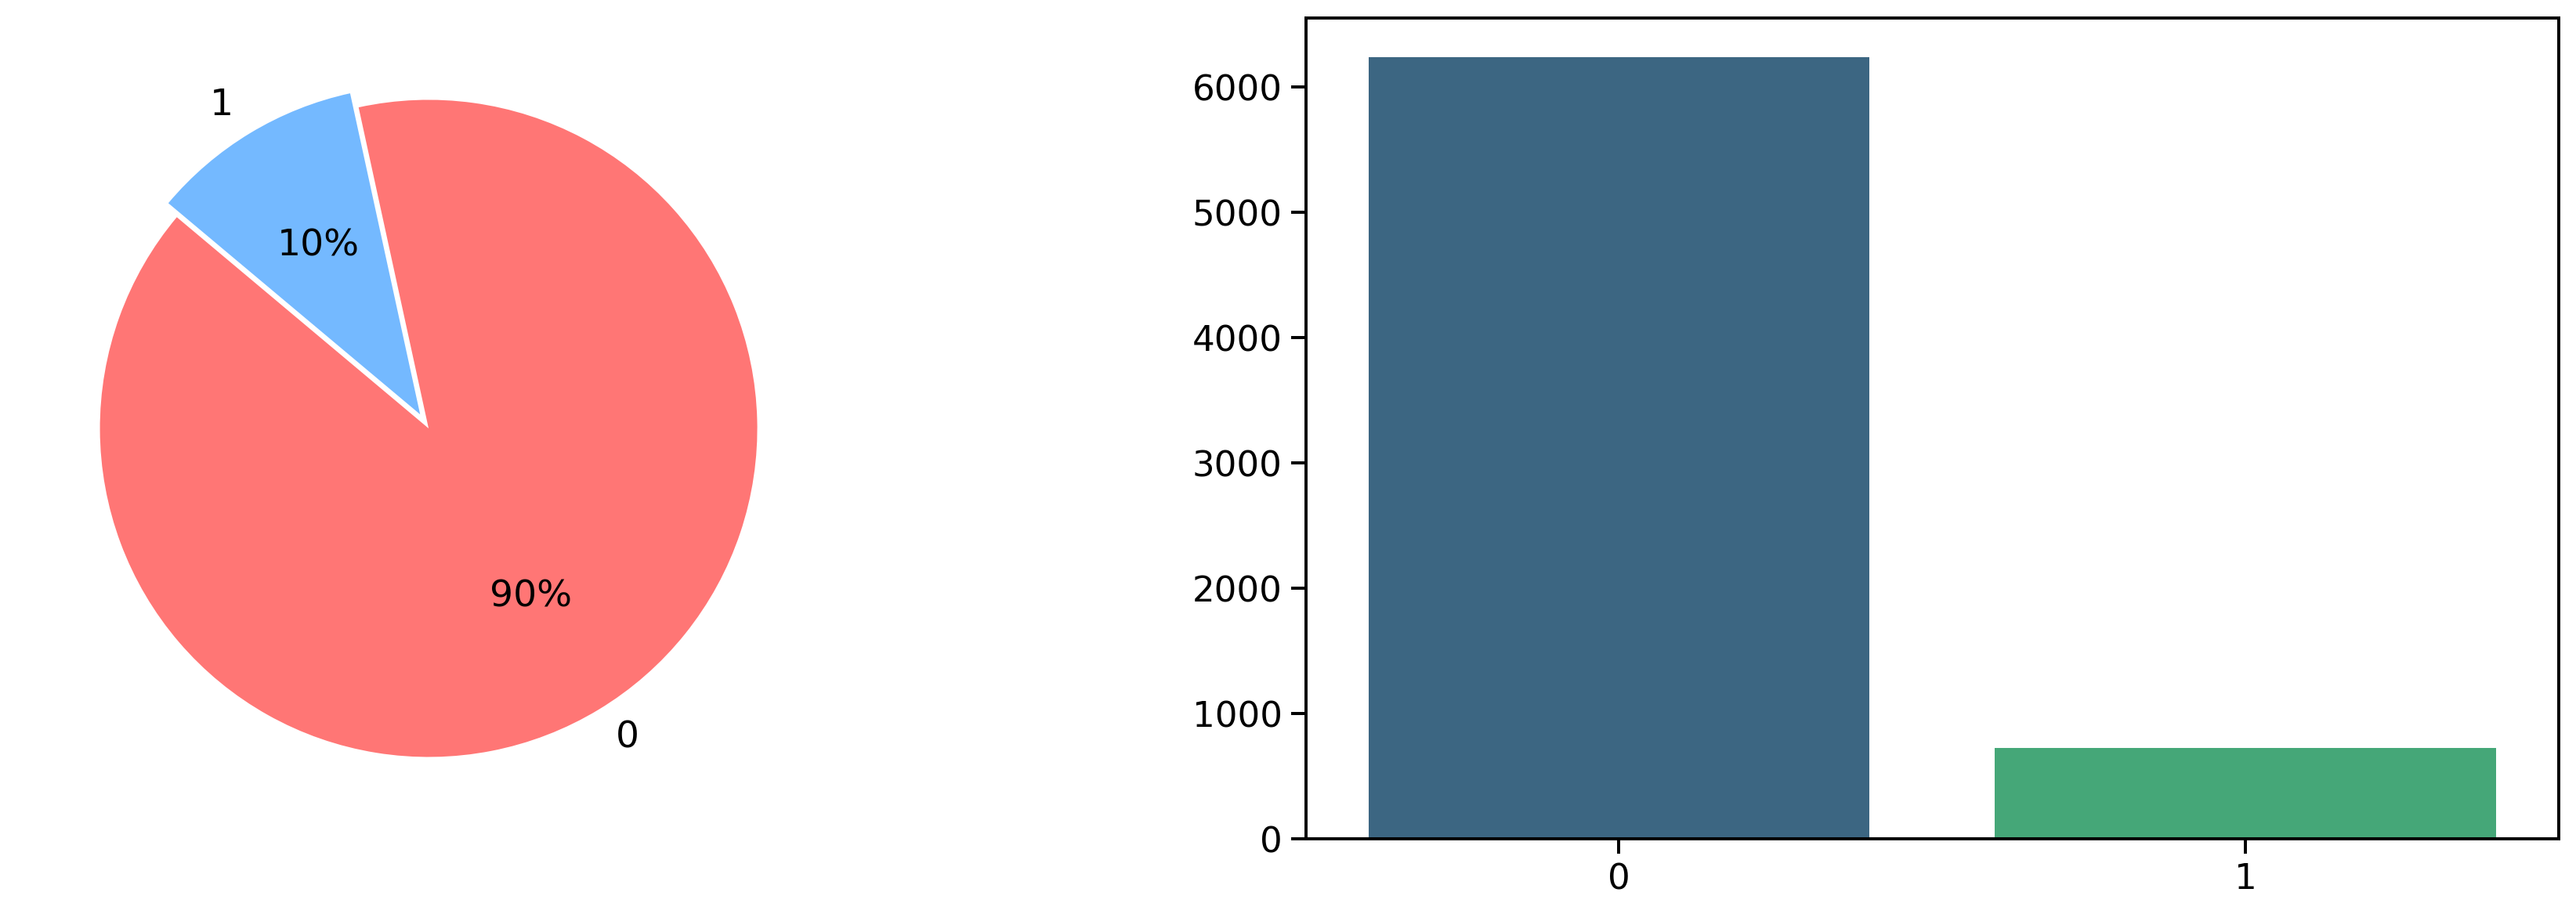

In [157]:
labels = [0,1]
sizes = [6240, 730]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140,
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x=labels,y = sizes, palette= 'viridis')

plt.show()

In [158]:
df["Words"] = df["text"].apply(lambda x: len(x.split()))


def total_char(text):
  char = 0
  for i in text.split():
    char += len(i)
  return char

df['Total Chars'] = df["text"].apply(total_char)
df.head()




text  label  Words  \
0                                         oh my gosh    1.0      3   
1  trouble sleeping, confused mind, restless hear...    1.0     10   
2  All wrong, back off dear, forward doubt. Stay ...    1.0     14   
3  I've shifted my focus to something else but I'...    1.0     11   
4  I'm restless and restless, it's been a month n...    1.0     14   

   Total Chars  
0            8  
1           55  
2           65  
3           51  
4           59

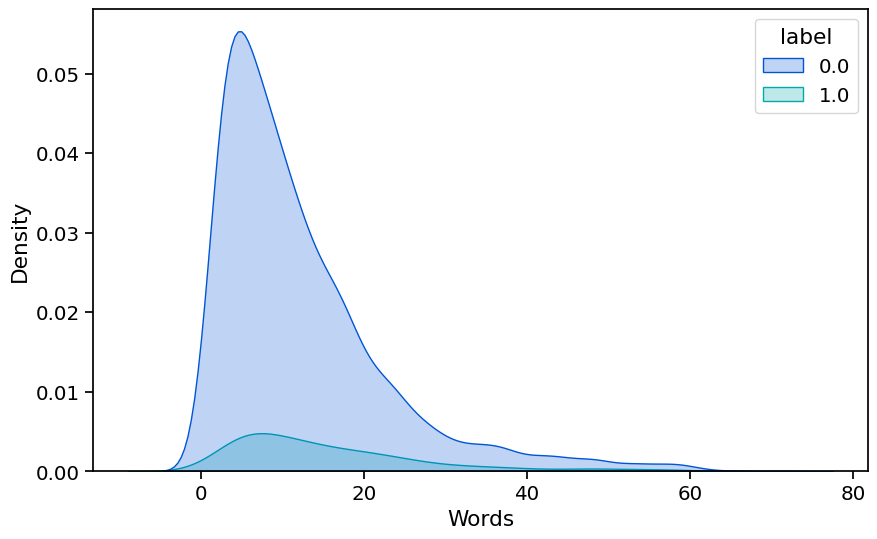

In [159]:

plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['Words'], hue= df['label'], palette= 'winter', shade = True)
plt.show()

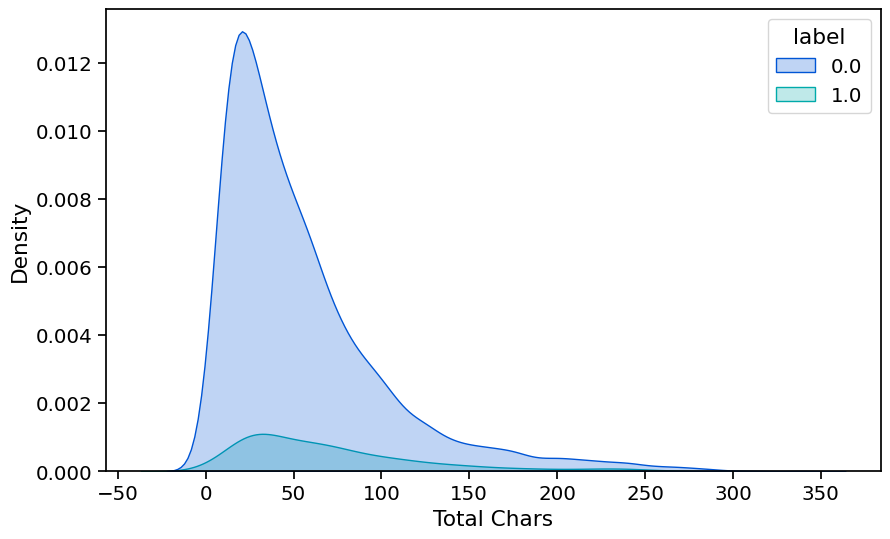

In [160]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['Total Chars'], hue= df['label'], palette= 'winter', shade = True)
plt.show()

In [161]:
def convert_lowercase(text):
  return text.lower()

df['text'] = df['text'].apply(convert_lowercase)
df.head()

text  label  Words  \
0                                         oh my gosh    1.0      3   
1  trouble sleeping, confused mind, restless hear...    1.0     10   
2  all wrong, back off dear, forward doubt. stay ...    1.0     14   
3  i've shifted my focus to something else but i'...    1.0     11   
4  i'm restless and restless, it's been a month n...    1.0     14   

   Total Chars  
0            8  
1           55  
2           65  
3           51  
4           59

In [162]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

df['text'] = df['text'].apply(remove_url)

In [163]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

df['text'] = df['text'].apply(remove_punc)

In [164]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

df['text'] = df['text'].apply(remove_stopwords)

In [165]:
def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

df['text'] = df['text'].apply(perform_stemming)

In [166]:
df['Total Words After Transformation'] = df['text'].apply(lambda x: np.log(len(x.split())))

In [167]:
df.head()


text  label  Words  \
0                                            oh gosh    1.0      3   
1       troubl sleep confus mind restless heart tune    1.0     10   
2  wrong back dear forward doubt stay restless re...    1.0     14   
3           ive shift focu someth els im still worri    1.0     11   
4                im restless restless month boy mean    1.0     14   

   Total Chars  Total Words After Transformation  
0            8                          0.693147  
1           55                          1.945910  
2           65                          2.197225  
3           51                          2.079442  
4           59                          1.791759

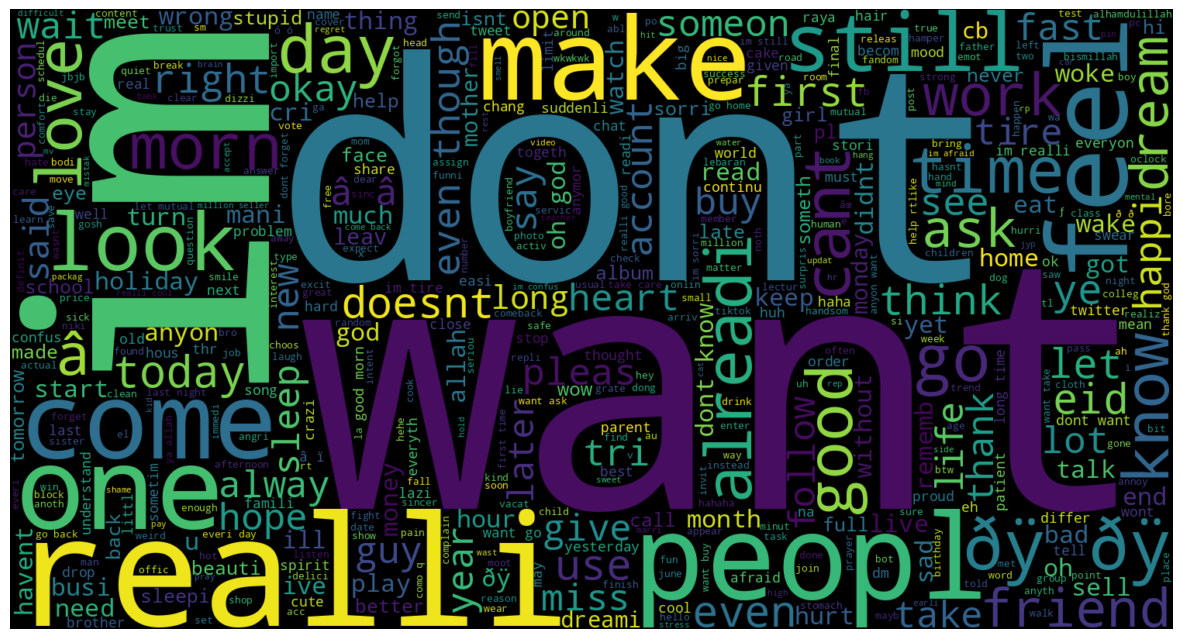

In [168]:
text = " ".join(df[df['label'] == 0]['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

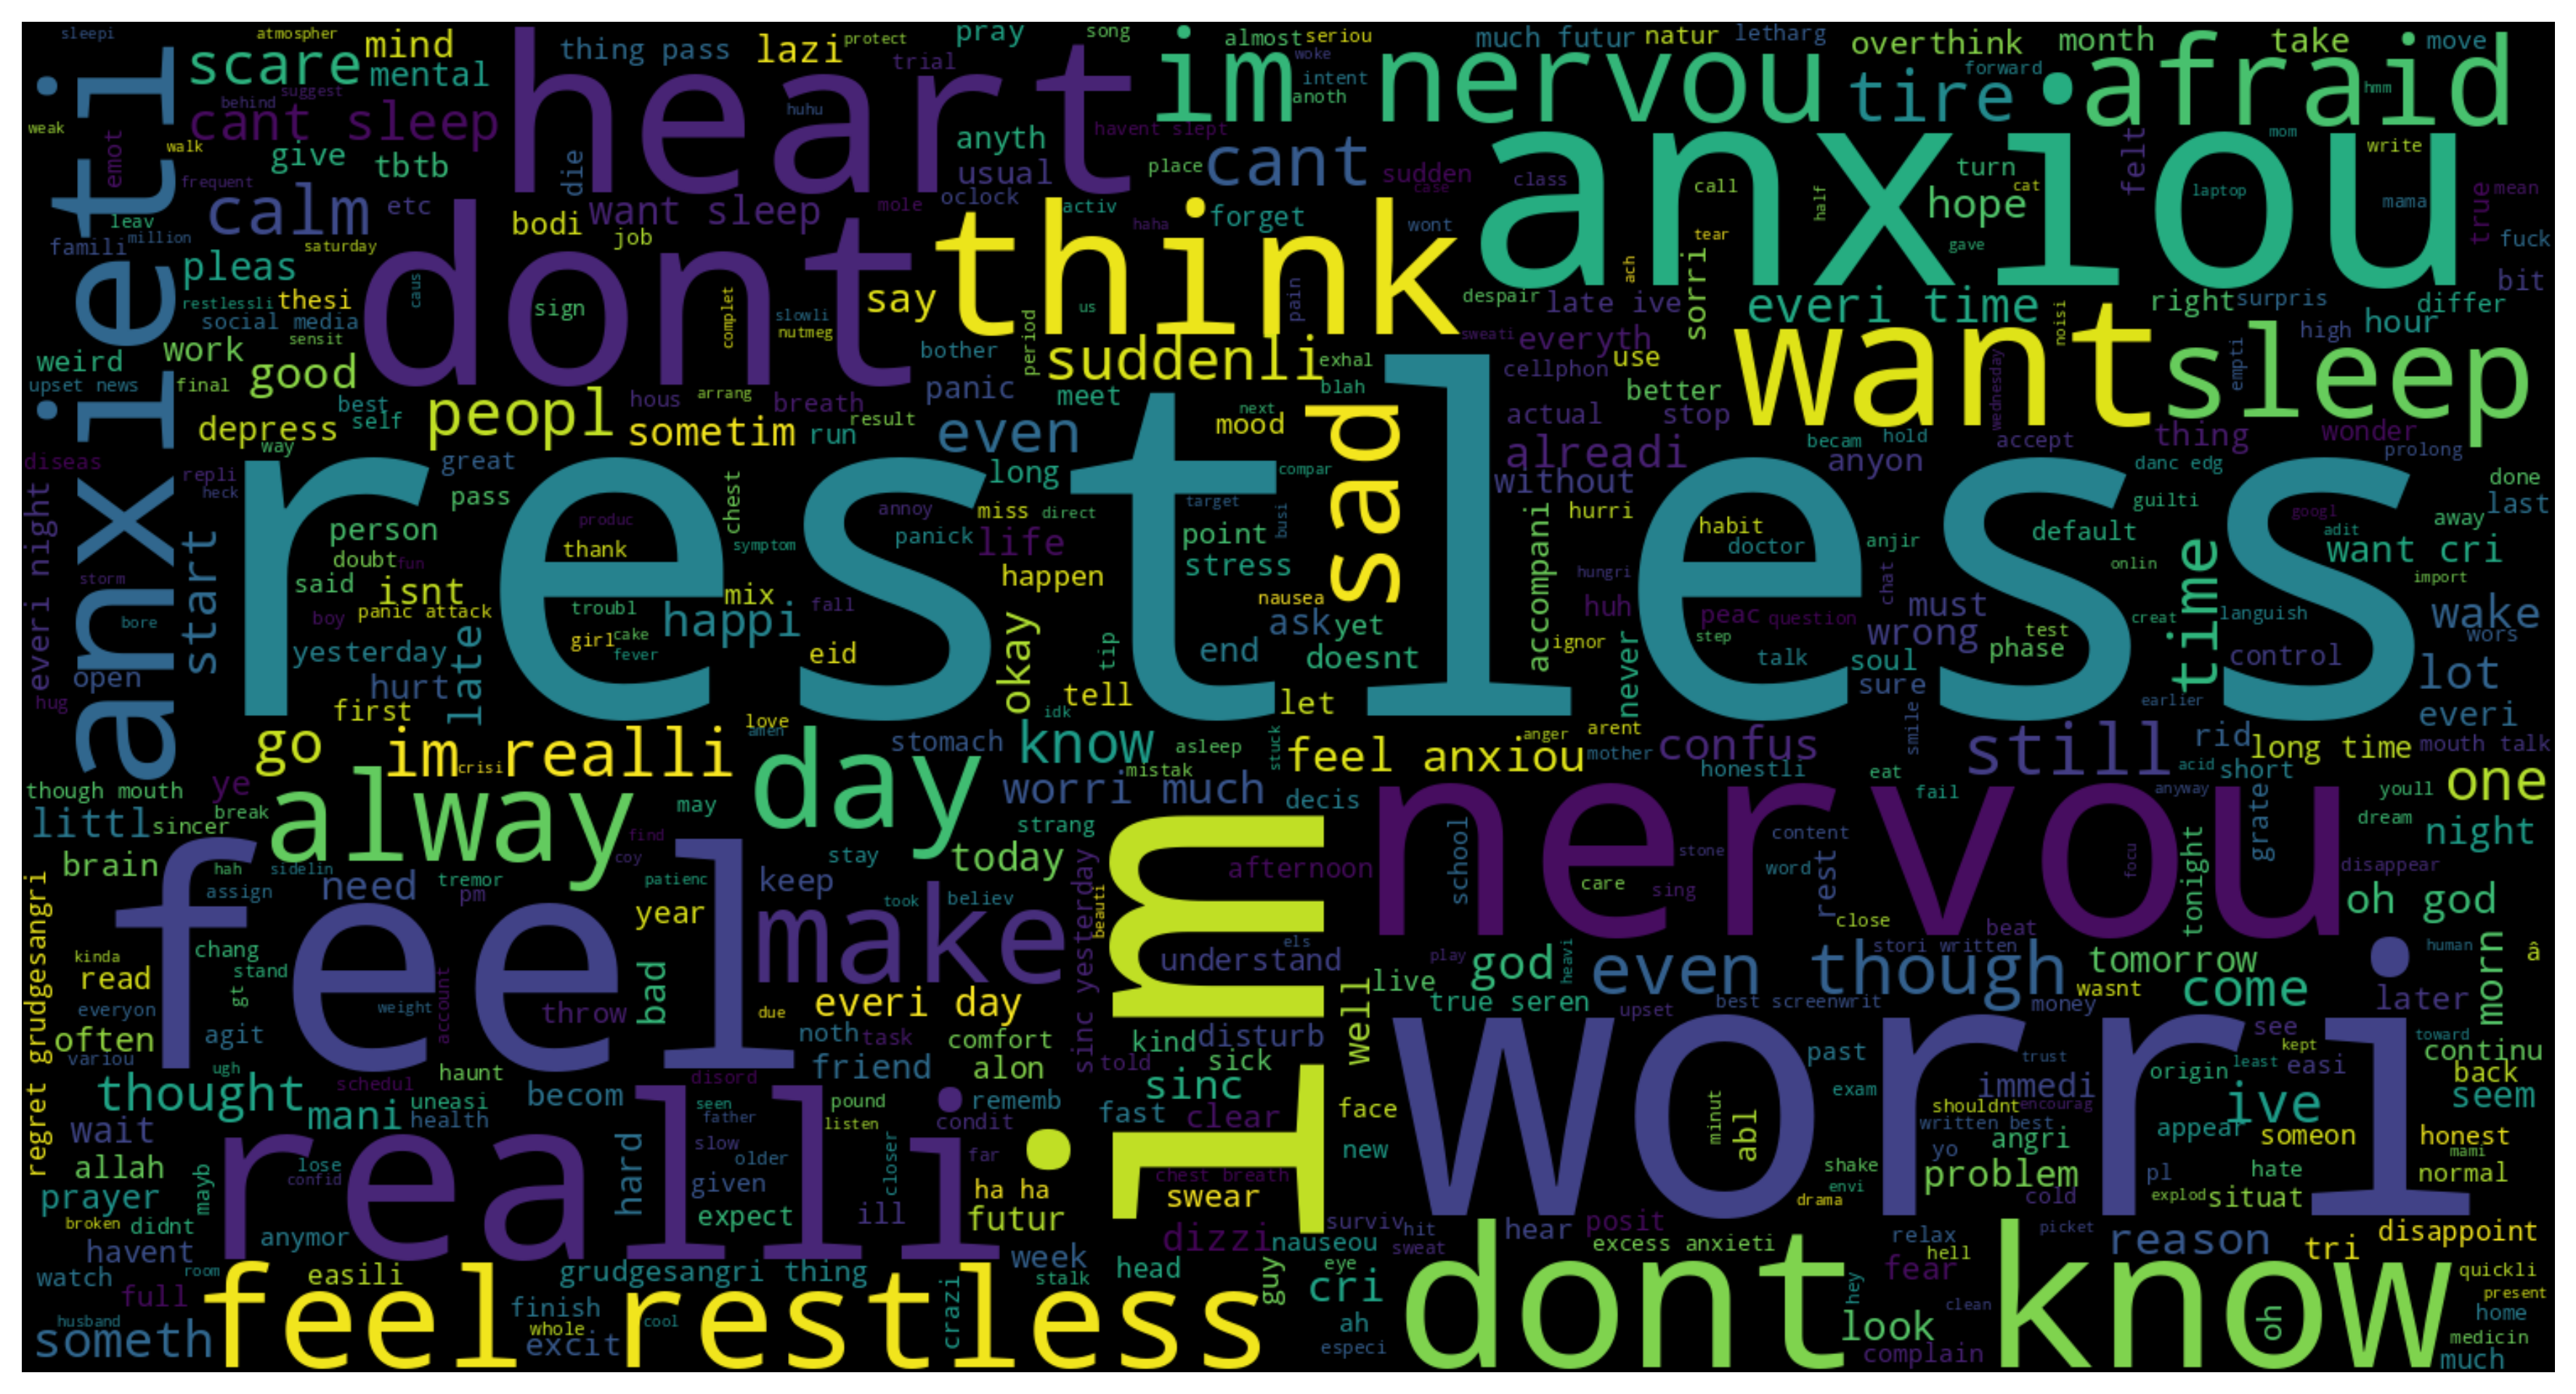

In [169]:
text = " ".join(df[df['label'] == 1]['text'])
plt.figure(figsize = (15, 10),dpi=300)
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

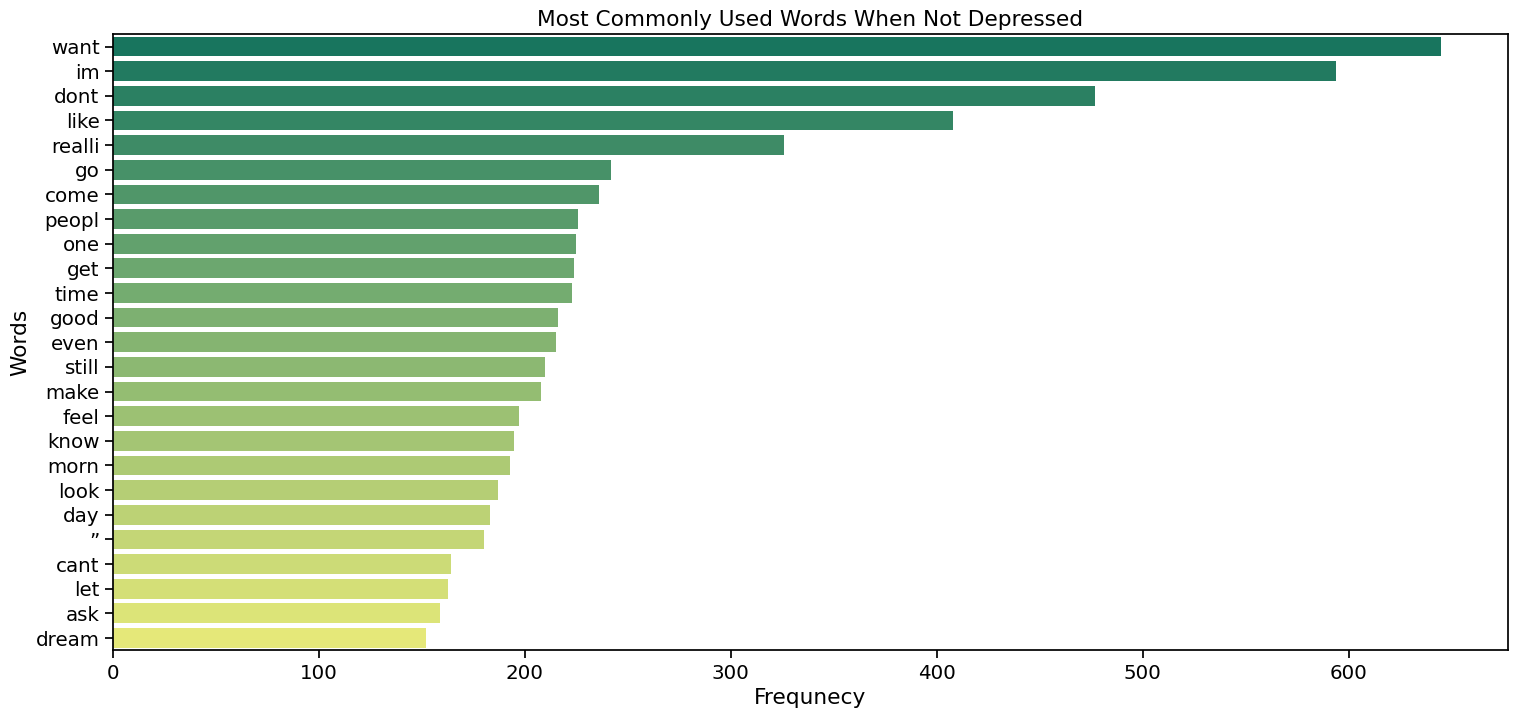

In [170]:
all_nodep_words = []
for sentence in df[df['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

data = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = data['Word'], x= data['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Not Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()


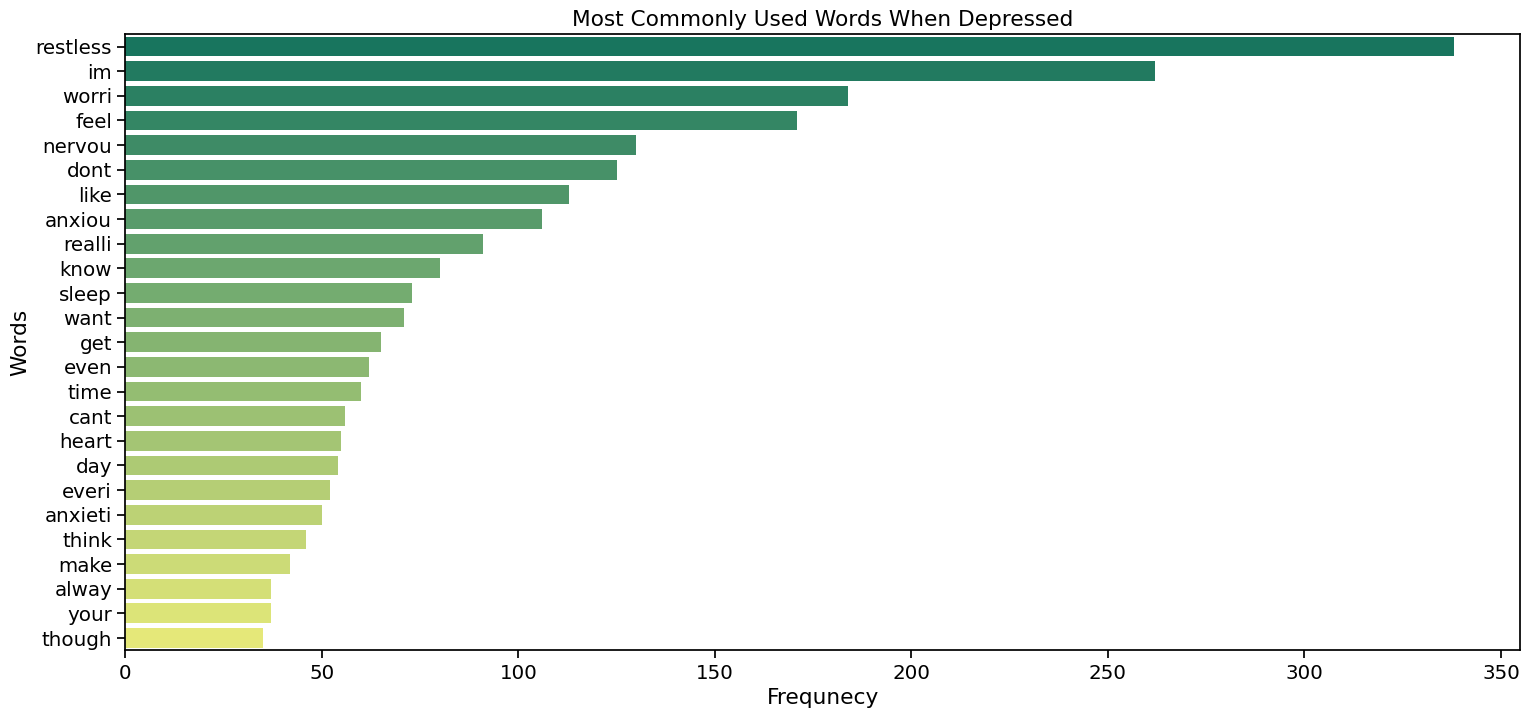

In [171]:
all_dep_words = []
for sentence in df[df['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

data = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = data['Word'], x= data['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [176]:

X = df["text"]
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)


tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

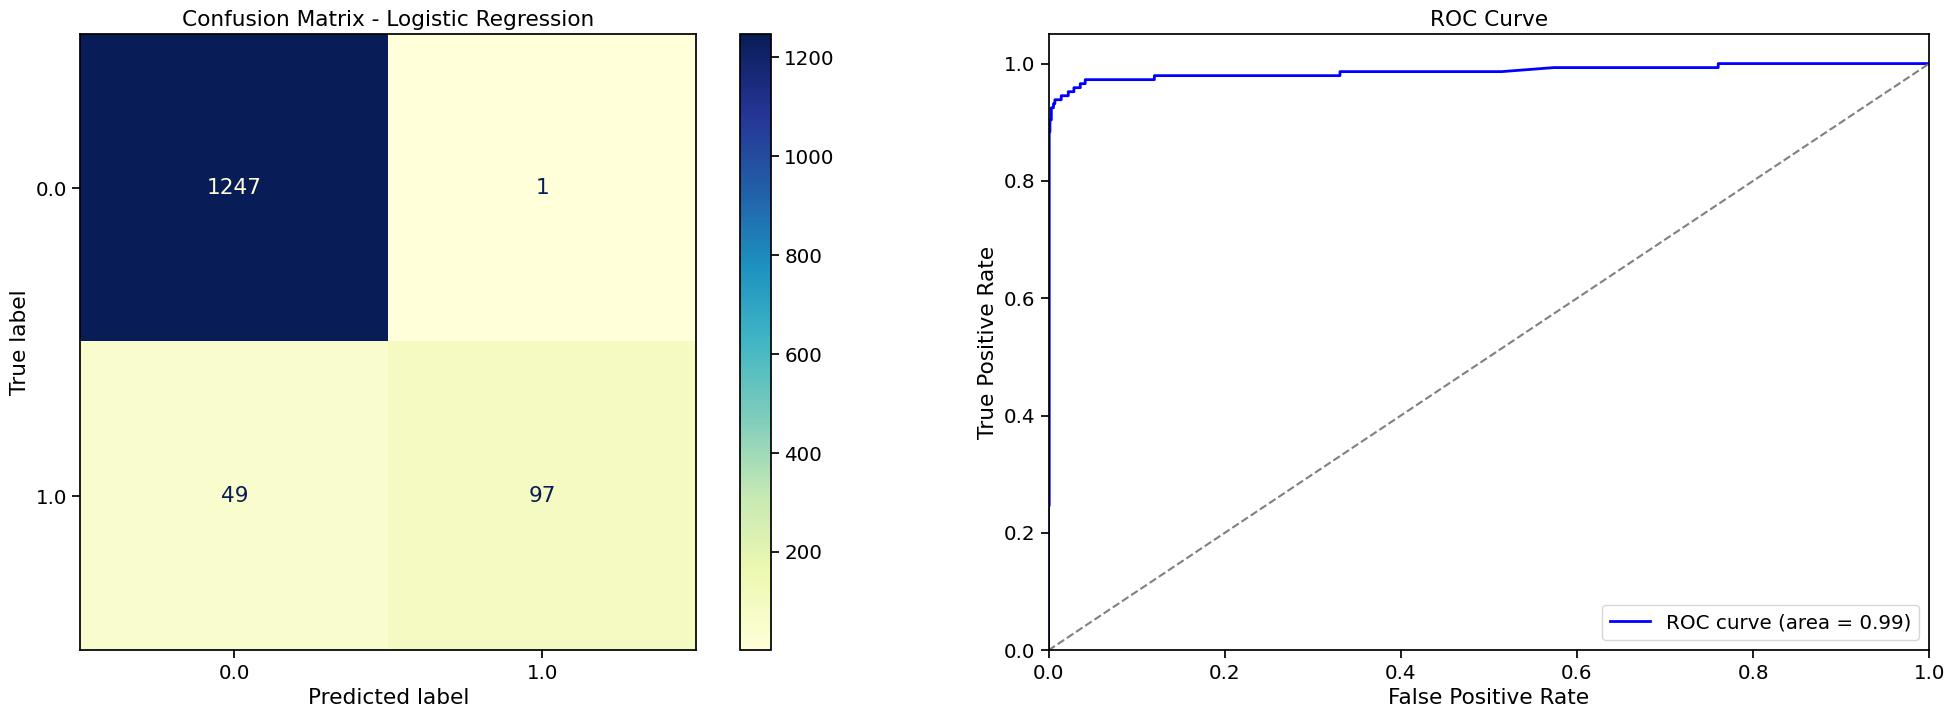

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the function to train the model and store metrics
def train_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    else:
        y_prob = model.decision_function(X_test)  # For SVM, use decision_function to get continuous values

    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = round(auc(fpr, tpr), 3)

    # Save metrics to the DataFrame
    results_df.loc[model_name] = [accuracy, precision, recall, roc_auc]

    # Plot confusion matrix and ROC curve
    sns.set_context('notebook', font_scale=1.3)
    fig, ax = plt.subplots(1, 2, figsize=(25, 8))

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[0], cmap='YlGnBu')
    ax[0].set_title(f'Confusion Matrix - {model_name}')

    # Plot ROC curve
    ax[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('ROC Curve')
    ax[1].legend(loc='lower right')

    plt.show()

# Create DataFrame to store results
results_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'ROC AUC'])

# Create model instances
log_reg = LogisticRegression()
svm_model = SVC(probability=True)  # SVM with probability=True to get prediction probabilities
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=300)

# Train and evaluate the models
train_model(log_reg, 'Logistic Regression')
train_model(svm_model, 'Linear SVM')
train_model(nb, 'Naive Bayes')
train_model(rf, 'Random Forest')

# Display the results DataFrame
print(results_df)
